In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
random.seed(1234)
mu, sigma = 0, 0.5 # mean and standard deviation
e = np.random.normal(mu, sigma, 100) #noise from guassian distribution

#constant
a0 = 2

#coeffients
a1 = -3
a2 = 4
a3 = 5
a4 = 7
a5 = 8
a6 = 5
a7 = 1
a8 = -2
a9 = -5
a10 = 8
a11 = 7
a12 = 4
a13 = -6
a14 = 2
a15 = 8
a16 = 3
a17 = 5
a18 = -8
a19 = 9
a20 = -4

#variable(linspace (start, stop, numb of items to generate))
x = np.linspace(0, 2, 100)

In [3]:
parameters = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9] 

degree = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
def generate_data(length, order):
    p = parameters[:order]
    y = np.zeros(length)
    
    for i in range(len(p)):
        y += p[i] * x ** i
        
    y += e
    return y 

In [5]:
#generate cubic data 
y = generate_data(100, 4)

In [10]:
def train_polynomial_model(x, y, degree):
    print(x)
    print(y)
    print(degree)
    lin_reg = LinearRegression()
    #print('Number of parameters: %d' % (num_params))
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = lin_reg.fit(x_poly, y)
    num_params = len(model.coef_) + 1
    num_params_list.append(num_params)
    return lin_reg

def make_predictions(train_model, x):
    return train_model.predict(x)

def print_stats(y, y_pred):
    print(r2_score(y, y_pred))
    print(mse(y, y_pred))

    # calculate aic for regression
def calculate_aic(self, n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic
 
    # calculate bic for regression
def calculate_bic(self, n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

def plot_model(x, y, y_pred):
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.show()

In [11]:
train_model = train_polynomial_model(x, y, degree)
predictions = make_predictions()
stats = print_stats()
plots = plot_model()

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797

TypeError: can only concatenate list (not "int") to list

# Previous Model (First attempt)

In [13]:
polynomial 3rd order
y = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + e

plt.figure(figsize=(10,8))
plt.scatter(x, y)

In [ ]:
#fitting linear regression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1, 1), y)
model_pred = lin_reg.predict(x.reshape(-1, 1))

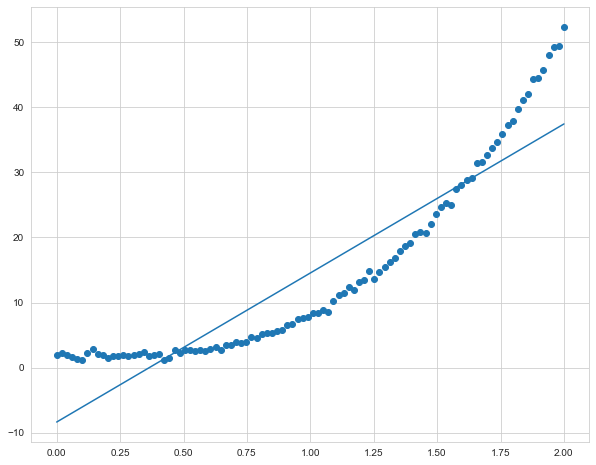

In [40]:
plt.figure(figsize=(10,8));
plt.scatter(x, y);
plt.plot(x, model_pred);

In [15]:
print('R-squared: {}'.format(r2_score(y, model_pred)))
print('MSE: {}'.format(mse(y, model_pred)))

R-squared: 0.8670206395416852
MSE: 25.472490421510333


In [14]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
lin_reg.fit(x_poly, y)
y_poly_pred = lin_reg.predict(x_poly)

In [15]:
print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
print('MSE: {}'.format(mse(y, y_poly_pred)))

R-squared: 0.9754322048803021
MSE: 50.587027197378305


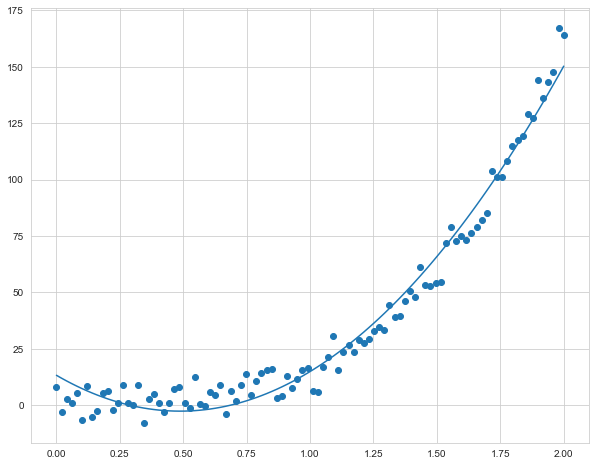

In [16]:
plt.figure(figsize=(10,8));
plt.scatter(x, y);
plt.plot(x, y_poly_pred);

In [17]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
lin_reg.fit(x_poly, y)
y_poly_pred = lin_reg.predict(x_poly)

In [18]:
print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
print('MSE: {}'.format(mse(y, y_poly_pred)))

R-squared: 0.9878984372368842
MSE: 24.918071876042546


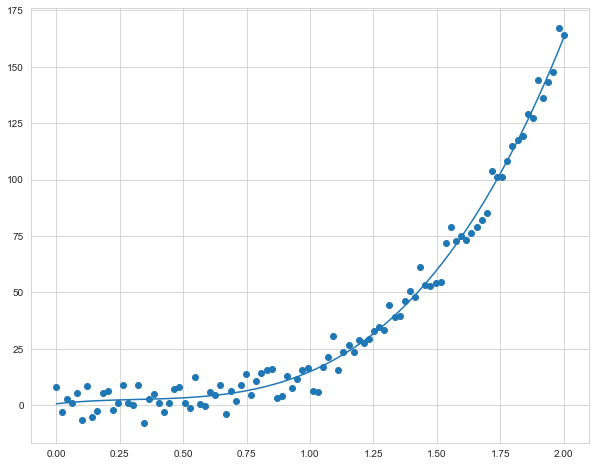

In [19]:
plt.figure(figsize=(10,8));
plt.scatter(x, y);
plt.plot(x, y_poly_pred);

In [20]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
lin_reg.fit(x_poly, y)
y_poly_pred = lin_reg.predict(x_poly)

In [21]:
print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
print('MSE: {}'.format(mse(y, y_poly_pred)))

R-squared: 0.9880155028877913
MSE: 24.677024470792563


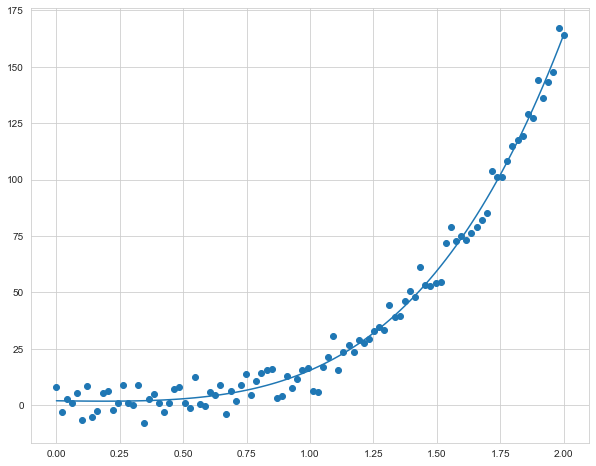

In [22]:
plt.figure(figsize=(10,8));
plt.scatter(x, y);
plt.plot(x, y_poly_pred);